# Домашнее задание по теме: Регрессия (линейная/полиномиальная)

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install pandas matplotlib numpy seaborn -y

## **ВНИМАНИЕ**

- **Задания описаны кратко, только самое необходимое, в основном только идеи и подсказки. Это творческая работа.**

- Для выполнения заданий можно использовать любые удобные способы, если в комментариях к заданию не указан конкретный метод. 

- Желательно использовать максимум пройденной информации или более продвинутые способы (если нашли самостоятельно).

- Вместо строки `место_для_ответа` необходимо вписать свой ответ. Не рядом, а вместо. Остальную часть оформления менять не нужно.

- В ячейках с комментариями необходимо реализовать то, что описывает комментарий.

- В строке "Подсказка" могут быть перечислены какие-то методы, которыми можно воспользоваться, но это не обязательно, так как это только один из множества вариантов (не факт, что лучший).

- Можно использовать `Pipeline`, но не обязательно.

- Графики можно рисовать любым способом / цветом и т.п. Главное, чтобы было понятно, что там изображено.

- При выполнении задания необходимо понимать, что значит каждое слово (на английском). Если значение слова непонятно, то необходимо разобраться с его значением самостоятельно. Пожалуйста, будьте внимательны, перепроверяйте значения слов, если не уверены.

## Импорт необходимых пакетов

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

In [33]:
import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

sklearn.__version__

'0.24.1'

## Загрузка данных

[Источник (Medical Cost Personal Datasets)](https://www.kaggle.com/mirichoi0218/insurance)

In [8]:
df = pd.read_csv("./../../data/insurance.csv")

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Преобразование типов

Привести в порядок типы данных. В результате не должно быть типа `object`.

In [10]:
df['sex'] = df.sex.astype('category')
df['smoker'] = df.smoker.astype('category')
df['region'] = df.region.astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


## Разделить на train/test

- Разделить данные на `y` и `X`. 
- `y` - это колонка `charges`.
- Разделить данные на train / test.
- **В дальнейшем при анализе использовать строго `train` данные и не подсматривать в `test`.**

In [12]:
from sklearn.model_selection import train_test_split

target_col = 'charges'
y = df[target_col].copy()
X = df.drop(target_col, axis=1)

In [13]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [14]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Выбросы

- Есть ли выбросы? Каково распределение данных?
    - `hist`
    - `kde`
    - `boxplot`
- Нужно ли с этим что-то делать?

In [16]:
df_train = X_train.join(y_train)
df_train

,age,sex,bmi,children,smoker,region,charges
1079,63,male,33.660,3,no,southeast,15161.53440
303,28,female,33.000,2,no,southeast,4349.46200
1320,31,male,31.065,3,no,northwest,5425.02335
5,31,female,25.740,0,no,southeast,3756.62160
347,46,male,33.345,1,no,northeast,8334.45755
...,...,...,...,...,...,...,...
372,42,female,33.155,1,no,northeast,7639.41745
362,19,female,21.700,0,yes,southwest,13844.50600
407,47,female,23.600,1,no,southwest,8539.67100
39,60,male,39.900,0,yes,southwest,48173.36100


In [17]:
df_num_cols = df_train.select_dtypes(include=np.number)
df_num_cols_len = len(df_num_cols.columns)
df_num_cols_len

4

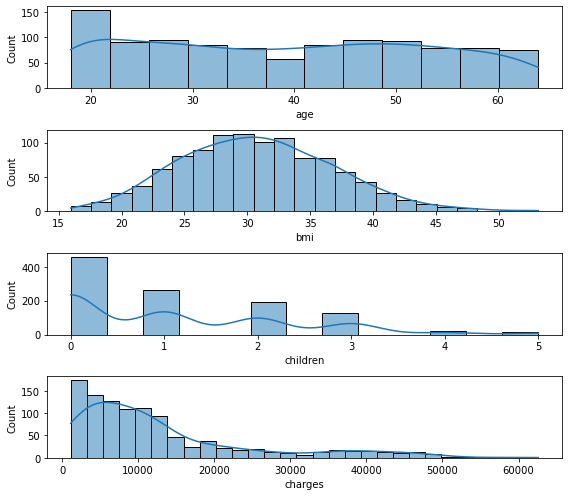

In [18]:
fig, axs = plt.subplots(df_num_cols_len, 1, figsize=(8, 7))

for index, num_col in enumerate(df_num_cols):
    sns.histplot(data=df_train[num_col], 
                 kde=True, 
                 ax=axs[index])
fig.tight_layout()

## Анализ корреляций

- Проверить нет ли мультиколлинеарности.
- Если есть, то нужно ли что-то с этим делать?

Подсказка: в `sns.heatmap` можно указать параметры `vmin`, `vmax` для более адекватного распределения цвета.

Text(0.5, 1.0, 'Correlation Matrix of features')

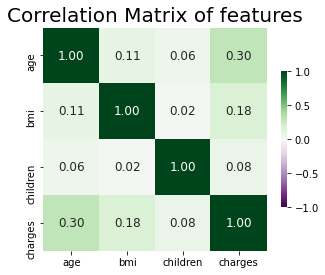

In [19]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(5, 5))

ax = sns.heatmap(
    correlation_matrix,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='PRGn',
    cbar_kws={"shrink": .5},
    annot_kws={"size": 12},
    robust=True,
    vmin=-1, 
    vmax=1
)

plt.title('Correlation Matrix of features', fontsize=20)

## Простая линейная регрессия

Пока что используется только **один признак**. Для этого в метод `fit` в качестве `X` можно передать `X_train[[col_name]]`, аналогично с тестовыми данными.

- Если необходимо, то использовать методы feature engineering. 
- Помнить о том, что может быть полезна нормализация/стандартизация.
- Обучить модель простой линейной регрессии.
- Проанализировать результаты (различные метрики). Написать выводы/идеи.
- Нарисовать график.

Подсказка: если не используется `Pipeline`, то важно не забыть применить все преобразования, которые были выполнены над трейновыми данными, к тестовым данным.

In [20]:
simple_regr = LinearRegression()
simple_regr.fit(X_train[['age']], y_train)
print('Coefficients: ', simple_regr.coef_)
print('Intercept: ', simple_regr.intercept_)

Coefficients:  [257.81183982]
Intercept:  2978.1547743730825


In [22]:
y_train_predicted = simple_regr.predict(X_train[['age']])
print(f'R2: {r2_score(y_train, y_train_predicted)}')
print(f"MSE: {mean_squared_error(y_train, y_train_predicted, squared=True)}")

R2: 0.0919263912733208
MSE: 130602765.09095505


<AxesSubplot:xlabel='age', ylabel='charges'>

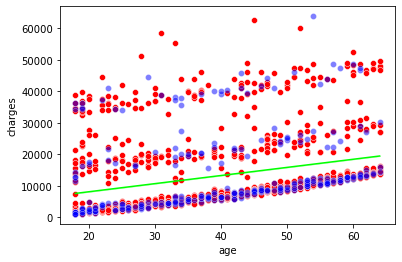

In [23]:
sns.scatterplot(x=X_train['age'], y=y_train, color='red')
sns.scatterplot(x=X_test['age'], y=y_test, color='blue', alpha=0.5)
sns.lineplot(x=X_train['age'], y=y_train_predicted, color='lime')

In [25]:
y_test_predicted = simple_regr.predict(X_test[['age']])

print(f'R2 (train): {r2_score(y_train, y_train_predicted)}')
print(f'R2 (test): {r2_score(y_test, y_test_predicted)}')

print(f"MSE (train): {mean_squared_error(y_train, y_train_predicted, squared=True)}")
print(f"MSE (test): {mean_squared_error(y_test, y_test_predicted, squared=True)}")

R2 (train): 0.0919263912733208
R2 (test): 0.07399107444993525
MSE (train): 130602765.09095505
MSE (test): 144942113.95097202


## Множественная линейная регрессия

Можно использовать любое количество признаков.

- Если необходимо, то использовать методы feature engineering.
- Помнить о том, что может быть полезна нормализация/стандартизация.
- Обучить модель линейной регрессии.
- Проанализировать результаты (различные метрики).

Подсказка: если не используется `Pipeline`, то важно не забыть применить все преобразования, которые были выполнены над трейновыми данными, к тестовым данным.

In [26]:
X_test

,age,sex,bmi,children,smoker,region
1242,22,female,21.28,3,no,northwest
1001,24,male,32.70,0,yes,southwest
274,25,male,27.55,0,no,northwest
1282,18,female,21.66,0,yes,northeast
261,20,female,26.84,1,yes,southeast
...,...,...,...,...,...,...
21,30,female,32.40,1,no,southwest
82,22,male,37.62,1,yes,southeast
681,19,male,20.30,0,no,southwest
442,18,male,43.01,0,no,southeast


In [30]:
multiple_regr = LinearRegression()
multiple_regr.fit(X_train[['age', 'bmi', 'children']], y_train)

print('Coefficients: ', multiple_regr.coef_)
print('Intercept: ', multiple_regr.intercept_)

Coefficients:  [240.90074239 293.69925264 607.77083839]
Intercept:  -6069.5720291477355


In [32]:
y_train_predicted = multiple_regr.predict(X_train[['age', 'bmi', 'children']])
y_test_predicted = multiple_regr.predict(X_test[['age', 'bmi', 'children']])

print(f'R2 (train): {r2_score(y_train, y_train_predicted)}')
print(f'R2 (test): {r2_score(y_test, y_test_predicted)}')

print(f"MSE (train): {mean_squared_error(y_train, y_train_predicted, squared=True)}")
print(f"MSE (test): {mean_squared_error(y_test, y_test_predicted, squared=True)}")

R2 (train): 0.11791535982825097
R2 (test): 0.11968205117223263
MSE (train): 126864928.06704327
MSE (test): 137790404.53231764


## Полиномиальная множественная регрессия

Можно использовать любое количество признаков.
Попробовать несколько различных степеней полинома.

- Если необходимо, то использовать методы feature engineering.
- Помнить о том, что может быть полезна нормализация/стандартизация.
- Обучить модель линейной регрессии.
- Проанализировать результаты (различные метрики).

Подсказка: 
- Если не используется `Pipeline`, то важно не забыть применить все преобразования, которые были выполнены над трейновыми данными, к тестовым данным.
- Перебор нескольких степеней полинома можно сделать в цикле и аккуратно вывести метрики для каждого варианта.

In [38]:
for degree in range(2, 5):
    print(f'degree = {degree}')
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train[['age', 'bmi', 'children']])
    X_test_poly = poly.transform(X_test[['age', 'bmi', 'children']])
    poly_regr = LinearRegression()
    poly_regr.fit(X_train_poly, y_train)
    
    y_train_predicted = poly_regr.predict(X_train_poly)
    y_test_predicted = poly_regr.predict(X_test_poly)

    print(f'R2 (train): {r2_score(y_train, y_train_predicted)}')
    print(f'R2 (test): {r2_score(y_test, y_test_predicted)}')

    print(f"MSE (train): {mean_squared_error(y_train, y_train_predicted, squared=True)}")
    print(f"MSE (test): {mean_squared_error(y_test, y_test_predicted, squared=True)}")
    
    print('-' * 15, '\n')


degree = 2
R2 (train): 0.1265609020211509
R2 (test): 0.1124840046023795
MSE (train): 125621491.73627429
MSE (test): 138917067.631739
--------------- 

degree = 3
R2 (train): 0.14201632571278733
R2 (test): 0.07229184787244947
MSE (train): 123398631.1109001
MSE (test): 145208082.7612361
--------------- 

degree = 4
R2 (train): -0.9814056499654369
R2 (test): -0.9256114992572906
MSE (train): 284973656.50257134
MSE (test): 301403359.78388214
--------------- 

